<a href="https://colab.research.google.com/github/shoggart/final-project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data Cleaning

Import necessary libraries for fakes news detection program.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import nltk
from nltk.corpus import stopwords
import string
import gensim
import keras
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from keras.backend import clear_session
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from google.colab import files

Library to upload datasets to google colab.

In [2]:
files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


Read the csv file into a pandas dataframe using the proper encoding scheme.

In [3]:
df = pd.read_csv("FA-KES-Dataset.csv", encoding = "ISO-8859-1")
# fake = pd.read_csv("Fake.csv")
# real = pd.read_csv("True.csv")

In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0]) < 120)
  except:
    unknown_publishers.append(index)

In [ ]:
real = real.drop(8970, axis=0)
publisher = []
tmp_text = []
for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append("Unknown")
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
real['publisher'] = publisher
real['text'] = tmp_text
empty_fake_index = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]
fake['text'] = fake['title'] + " " + fake['text']
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['text'].apply(lambda x: str(x).lower())
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['class'] = 0
real['class'] = 1
real = real[['text', 'class']]
fake = fake[['text', 'class']]
df = real.append(fake, ignore_index=True)

In [ ]:
df

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1
...,...,...
44892,mcpain: john mccain furious that iran treated ...,0
44893,justice? yahoo settles e-mail privacy class-ac...,0
44894,sunnistan: us and allied ‘safe zone’ plan to t...,0
44895,how to blow $700 million: al jazeera america f...,0


Check the first five rows of the dataframe to make sure the CSV file was read correctly.

Check the dimensions of the dataframe.

In [ ]:
df.shape

(44897, 2)

Drop any duplicates in the dataframe and do so in place so as not to completely resave the dataframe in memory.

In [ ]:
df.drop_duplicates(inplace = True)

Recheck the dimensions of the dataframe.

In [ ]:
df.shape

(39103, 2)

Download nltk stopwords corpora.

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Function to clean the article of punctuation and the stopwords using the NLTK toolkit.

In [5]:
def clean_article(text):
  # Remove the punctuation from the text and save into an array
  remove_punc = [ch for ch in text if ch not in string.punctuation]
  # Recombine the text into a string with the punctuation removed
  remove_punc = ''.join(remove_punc)
  # Remove the stopwords which carry low semantic value from text
  clean_text = [word for word in remove_punc.split() if word.lower() not in stopwords.words('english')]
  # Return the cleaned text
  return clean_text

Check the first five elements of the cleaned article content to check the function works properly.

In [7]:
df['article_content'].head().apply(clean_article)

0    [Wed, 05, Apr, 2017, Syria, attack, symptoms, ...
1    [Fri, 07, Apr, 2017, 0914, Homs, governor, say...
2    [Sun, 16, Apr, 2017, Death, toll, Aleppo, bomb...
3    [Wed, 19, Apr, 2017, Aleppo, bomb, blast, kill...
4    [Sun, 10, Jul, 2016, 29, Syria, Rebels, Dead, ...
Name: article_content, dtype: object

Implement a Bag-of-Words CountVectorizer which maintains multiplicity of words in the article but not the word order or grammar.

In [ ]:
# Convert article content to a sparse matrix of the counts of tokenized words.
bow = CountVectorizer(analyzer = clean_article).fit_transform(df['text'])

# Machine Learning Algorithms

Split the dataset into 80% training data and 20% test data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bow, df['class'], test_size = 0.2, random_state = 0)

Train the Multinomial Naive Bayes Classifier on the randomly chosen training data.

In [ ]:
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)

MultinomialNB()

Print the results of the Multinomial Naive Bayes Classifier on the training data.

---



In [ ]:
pred_mnb = mnb_classifier.predict(X_train)
print(classification_report(y_train, pred_mnb))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     14290
           1       0.97      0.99      0.98     16992

    accuracy                           0.98     31282
   macro avg       0.98      0.98      0.98     31282
weighted avg       0.98      0.98      0.98     31282



Print the results of the Multinomial Naive Bayes Classifier on the test data.

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3618
           1       0.96      0.98      0.97      4203

    accuracy                           0.97      7821
   macro avg       0.97      0.97      0.97      7821
weighted avg       0.97      0.97      0.97      7821



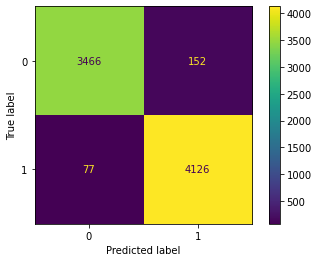

In [ ]:
pred_mnb = mnb_classifier.predict(X_test)
print(classification_report(y_test, pred_mnb))
# Generate a confusion matrix of predicted vs. actual y-values.
cm = confusion_matrix(y_test, pred_mnb, labels=mnb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb_classifier.classes_)
disp.plot()
plt.grid(False)
plt.show()

Train the Decision Tree Classifier on the randomly chosen training data.

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Print the results of the Decision Tree Classifier on the training data.

In [ ]:
pred_dt = dt_classifier.predict(X_train)
print(classification_report(y_train, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14290
           1       1.00      1.00      1.00     16992

    accuracy                           1.00     31282
   macro avg       1.00      1.00      1.00     31282
weighted avg       1.00      1.00      1.00     31282



Print the results of the Decision Tree Classifier on the test data.

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3618
           1       0.94      0.96      0.95      4203

    accuracy                           0.95      7821
   macro avg       0.95      0.95      0.95      7821
weighted avg       0.95      0.95      0.95      7821



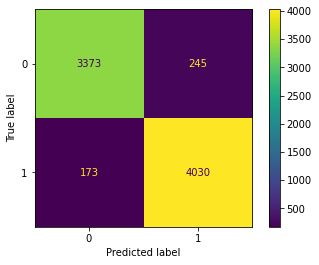

In [ ]:
pred_dt = dt_classifier.predict(X_test)
print(classification_report(y_test, pred_dt))
# Generate a confusion matrix of predicted vs. actual y-values.
cm = confusion_matrix(y_test, pred_dt, labels=dt_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_classifier.classes_)
disp.plot()
plt.grid(False)
plt.show()

Train the Logistic Regression Classifier on the randomly chosen training data.

In [ ]:
lr_classifier = LogisticRegression(solver='lbfgs', max_iter=100000)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

Print the results of the Logistic Regression Classifier on the training data.

In [ ]:
pred_lr = lr_classifier.predict(X_train)
print(classification_report(y_train, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14290
           1       1.00      1.00      1.00     16992

    accuracy                           1.00     31282
   macro avg       1.00      1.00      1.00     31282
weighted avg       1.00      1.00      1.00     31282



Print the results of the Logistic Regression Classifier on the test data.

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3618
           1       0.99      0.99      0.99      4203

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



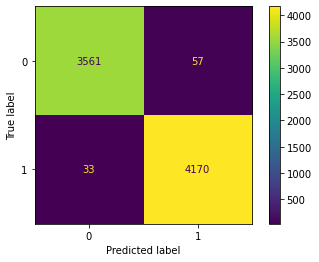

In [ ]:
pred_lr = lr_classifier.predict(X_test)
print(classification_report(y_test, pred_lr))
# Generate a confusion matrix of predicted vs. actual y-values.
cm = confusion_matrix(y_test, pred_lr, labels=lr_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_classifier.classes_)
disp.plot()
plt.grid(False)
plt.show()

Train the Random Forest Classifier on the randomly chosen training data.

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

Print the results of the Random Forest Classifier on the training data.

In [ ]:
pred_rf = rf_classifier.predict(X_train)
print(classification_report(y_train, pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14290
           1       1.00      1.00      1.00     16992

    accuracy                           1.00     31282
   macro avg       1.00      1.00      1.00     31282
weighted avg       1.00      1.00      1.00     31282



Print the results of the Random Forest Classifier on the test data.

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3618
           1       0.96      0.99      0.98      4203

    accuracy                           0.97      7821
   macro avg       0.98      0.97      0.97      7821
weighted avg       0.97      0.97      0.97      7821



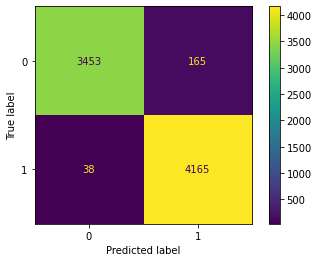

In [ ]:
pred_rf = rf_classifier.predict(X_test)
print(classification_report(y_test, pred_rf))
# Generate a confusion matrix of predicted vs. actual y-values.
cm = confusion_matrix(y_test, pred_rf, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot()
plt.grid(False)
plt.show()

Train the Stochastic Gradient Descent Classifier on the randomly chosen training data.


In [ ]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)

SGDClassifier()

Print the results of the Stochastic Gradient Descent Classifier on the training data.

In [ ]:
pred_sgd = sgd_classifier.predict(X_train)
print(classification_report(y_train, pred_sgd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14290
           1       1.00      1.00      1.00     16992

    accuracy                           1.00     31282
   macro avg       1.00      1.00      1.00     31282
weighted avg       1.00      1.00      1.00     31282



Print the results of the Stochastic Gradient Descent  Classifier on the test data.


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3618
           1       0.99      0.99      0.99      4203

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



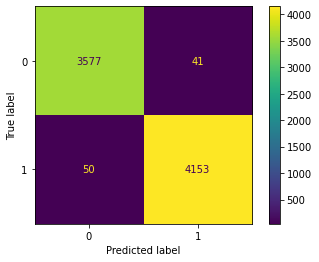

In [ ]:
pred_sgd = sgd_classifier.predict(X_test)
print(classification_report(y_test, pred_sgd))
# Generate a confusion matrix of predicted vs. actual y-values.
cm = confusion_matrix(y_test, pred_sgd, labels=sgd_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_classifier.classes_)
disp.plot()
plt.grid(False)
plt.show()

Train the AdaBoost Classifier on the randomly chosen training data.

In [ ]:
ab_classifier = AdaBoostClassifier()
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier()

Print the results of the AdaBoost Classifier on the training data.

In [ ]:
pred_ab = ab_classifier.predict(X_train)
print(classification_report(y_train, pred_ab))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     14290
           1       0.97      0.98      0.97     16992

    accuracy                           0.97     31282
   macro avg       0.97      0.97      0.97     31282
weighted avg       0.97      0.97      0.97     31282



Print the results of the AdaBoost Classifier on the test data.

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3618
           1       0.97      0.97      0.97      4203

    accuracy                           0.97      7821
   macro avg       0.97      0.97      0.97      7821
weighted avg       0.97      0.97      0.97      7821



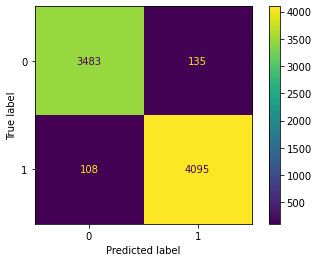

In [ ]:
pred_ab = ab_classifier.predict(X_test)
print(classification_report(y_test, pred_ab))
# Generate a confusion matrix of predicted vs. actual y-values.
cm = confusion_matrix(y_test, pred_ab, labels=ab_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ab_classifier.classes_)
disp.plot()
plt.grid(False)
plt.show()

Train the Support Vector Machine Classifier on the randomly chosen training data.

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

Print the results of the Support Vector Machine Classifier on the training data.

In [ ]:
pred_svm = svm_classifier.predict(X_train)
print(classification_report(y_train, pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14290
           1       0.99      1.00      1.00     16992

    accuracy                           1.00     31282
   macro avg       1.00      1.00      1.00     31282
weighted avg       1.00      1.00      1.00     31282



Print the results of the Support Vector Machine Classifier on the test data.

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3618
           1       0.98      0.99      0.99      4203

    accuracy                           0.98      7821
   macro avg       0.98      0.98      0.98      7821
weighted avg       0.98      0.98      0.98      7821



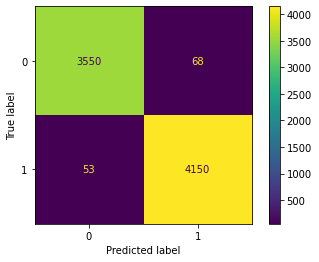

In [ ]:
pred_svm = svm_classifier.predict(X_test)
print(classification_report(y_test, pred_svm))
# Generate a confusion matrix of predicted vs. actual y-values.
cm = confusion_matrix(y_test, pred_svm, labels=svm_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot()
plt.grid(False)
plt.show()

Use the GridSearchCV package to determine the best value of K in the K Nearest Neighbors classifer on this data.

In [ ]:
# Dictionary with for range function to test different values of K.
parameters = {"n_neighbors": range(1, 50)}
# Method to test a set of parameters for an estimator.
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
# Fit the appropriate value of K for the training data.
gridsearch.fit(X_train, y_train)
# Print the best value of K for K-Nearest Neighbors algorithm on training data.
print(gridsearch.best_params_['n_neighbors'])

1


Train the K Nearest Neighbors Classifier on the randomly chosen training data.

In [ ]:
# Pass best value of K to KNeighborsClassifier.
knn_classifier = KNeighborsClassifier(gridsearch.best_params_['n_neighbors'])
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Print the results of the K Nearest Neighbors Classifier on the training data.

In [ ]:
pred_knn = knn_classifier.predict(X_train)
print(classification_report(y_train, pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14290
           1       1.00      1.00      1.00     16992

    accuracy                           1.00     31282
   macro avg       1.00      1.00      1.00     31282
weighted avg       1.00      1.00      1.00     31282



Print the results of the K Nearest Neighbors Classifier on the test data.

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      3618
           1       0.80      0.79      0.80      4203

    accuracy                           0.78      7821
   macro avg       0.78      0.78      0.78      7821
weighted avg       0.78      0.78      0.78      7821



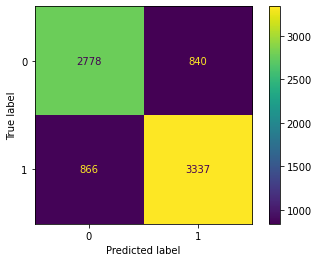

In [ ]:
pred_knn = knn_classifier.predict(X_test)
print(classification_report(y_test, pred_knn))
# Generate a confusion matrix of predicted vs. actual y-values.
cm = confusion_matrix(y_test, pred_knn, labels=knn_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)
disp.plot()
plt.grid(False)
plt.show()

Function to plot the validation and training accuracy and loss.

In [ ]:
plt.style.use('ggplot')
# Plot history of training and validation data.
def plt_hist(history):
    # Training accuracy history
    accuracy = history.history['acc']
    # Validation accuracy history
    validation_accuracy = history.history['val_acc']
    # Training loss history
    loss = history.history['loss']
    # Validation loss history
    validation_loss = history.history['val_loss']
    # Variable to hold number of data points to be graphed
    x = range(1, len(accuracy) + 1)
    # Dimensions of plot
    plt.figure(figsize=(12, 5))
    # Num rows and columns of subplots with this being the first one.
    plt.subplot(1, 2, 1)
    # Plot training accuracy history in blue
    plt.plot(x, accuracy, 'b', label='Training accuracy')
    # Plot validation accuracy history in red
    plt.plot(x, validation_accuracy, 'r', label='Validation accuracy')
    # Plot title
    plt.title('Training/Validation Accuracy')
    # Plot legend
    plt.legend()
    # Second subplot in this plot with 1 row and 2 columns
    plt.subplot(1, 2, 2)
    # Plot training loss in blue
    plt.plot(x, loss, 'b', label='Training loss')
    # Plot validation loss in red
    plt.plot(x, validation_loss, 'r', label='Validation loss')
    # Second plot title
    plt.title('Training/Validation Loss')
    # Second plot legend
    plt.legend()

# Baseline Neural Network

Create a baseline model for comparison with the more advanced models we will be testing.

In [ ]:
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0]) < 120)
  except:
    unknown_publishers.append(index)

In [ ]:
real = real.drop(8970, axis=0)
publisher = []
tmp_text = []
for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append("Unknown")
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
real['publisher'] = publisher
real['text'] = tmp_text
empty_fake_index = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]
fake['text'] = fake['title'] + " " + fake['text']
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['text'].apply(lambda x: str(x).lower())
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['class'] = 0
real['class'] = 1
real = real[['text', 'class']]
fake = fake[['text', 'class']]
df = real.append(fake, ignore_index=True)

In [ ]:
def clean_article(text):
  # Remove the punctuation from the text and save into an array
  remove_punc = [ch for ch in text if ch not in string.punctuation]
  # Recombine the text into a string with the punctuation removed
  remove_punc = ''.join(remove_punc)
  # Remove the stopwords which carry low semantic value from text
  clean_text = [word for word in remove_punc.split() if word.lower() not in stopwords.words('english')]
  # Return the cleaned text
  return clean_text

In [12]:
X = df['text'].apply(clean_article)
print(X)

0        [us, budget, fight, looms, republicans, flip, ...
1        [us, military, accept, transgender, recruits, ...
2        [senior, us, republican, senator, let, mr, mue...
3        [fbi, russia, probe, helped, australian, diplo...
4        [trump, wants, postal, service, charge, much, ...
                               ...                        
44892    [mcpain, john, mccain, furious, iran, treated,...
44893    [justice, yahoo, settles, email, privacy, clas...
44894    [sunnistan, us, allied, ‘safe, zone’, plan, ta...
44895    [blow, 700, million, al, jazeera, america, fin...
44896    [10, us, navy, sailors, held, iranian, militar...
Name: text, Length: 44897, dtype: object


In [13]:
y = df['class'].values

In [14]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)
len(w2v_model.wv.vocab)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [15]:
X = tokenizer.texts_to_sequences(X)
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [16]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))
  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  return weight_matrix

In [17]:
embedding_vectors = get_weight_matrix(w2v_model)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
model = Sequential()
model.add(layers.Dense(16,  activation='relu'))
model.add(layers.Dense(8,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Epoch 1/10
842/842 [==============================] - 5s 5ms/step - loss: 82.6059 - acc: 0.5017 - val_loss: 1.7622 - val_acc: 0.4824
Epoch 2/10
842/842 [==============================] - 4s 5ms/step - loss: 1.1067 - acc: 0.5096 - val_loss: 1.1973 - val_acc: 0.5259
Epoch 3/10
842/842 [==============================] - 4s 5ms/step - loss: 0.7614 - acc: 0.5194 - val_loss: 1.0053 - val_acc: 0.5259
Epoch 4/10
842/842 [==============================] - 4s 5ms/step - loss: 0.6999 - acc: 0.5196 - val_loss: 0.9569 - val_acc: 0.5259
Epoch 5/10
842/842 [==============================] - 5s 6ms/step - loss: 0.6902 - acc: 0.5198 - val_loss: 0.8943 - val_acc: 0.5259
Epoch 6/10
842/842 [==============================] - 4s 5ms/step - loss: 0.6887 - acc: 0.5198 - val_loss: 0.8883 - val_acc: 0.5263
Epoch 7/10
842/842 [==============================] - 4s 4ms/step - loss: 0.6885 - acc: 0.5198 - val_loss: 0.8865 - val_acc: 0.5263
Epoch 8/10
842/842 [==============================] - 4s 5ms/step - loss: 0

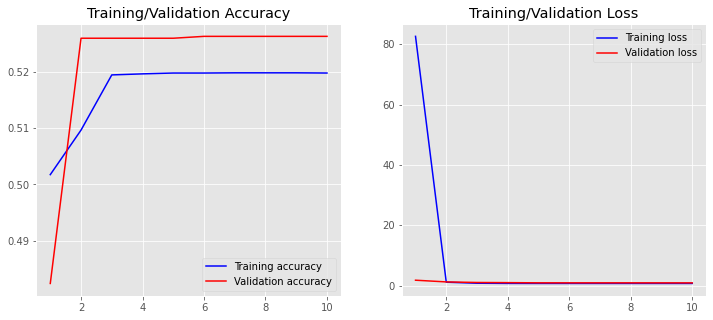

In [59]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plt_hist(history)

In [ ]:
model.summary()

Fit the baseline model to the data.

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plt_hist(history)

Epoch 1/10
3592/3592 [==============================] - 11s 3ms/step - loss: 50.4076 - accuracy: 0.5048 - val_loss: 0.7862 - val_accuracy: 0.5228
Epoch 2/10
3592/3592 [==============================] - 11s 3ms/step - loss: 0.9242 - accuracy: 0.5214 - val_loss: 0.8370 - val_accuracy: 0.5226
Epoch 3/10
3592/3592 [==============================] - 11s 3ms/step - loss: 0.7188 - accuracy: 0.5229 - val_loss: 0.6945 - val_accuracy: 0.5228
Epoch 4/10
3592/3592 [==============================] - 12s 3ms/step - loss: 0.6940 - accuracy: 0.5229 - val_loss: 0.6910 - val_accuracy: 0.5229
Epoch 5/10
3592/3592 [==============================] - 11s 3ms/step - loss: 0.6919 - accuracy: 0.5230 - val_loss: 0.6911 - val_accuracy: 0.5228
Epoch 6/10
3592/3592 [==============================] - 11s 3ms/step - loss: 0.6907 - accuracy: 0.5230 - val_loss: 0.6911 - val_accuracy: 0.5228
Epoch 7/10
3592/3592 [==============================] - 11s 3ms/step - loss: 0.6908 - accuracy: 0.5230 - val_loss: 0.6911 - val_a

In [ ]:
clear_session()

Evalute the model and print training and testing accuracy and loss.

In [ ]:
# Calculate model accuracy and loss from training data.
loss, accuracy = model.evaluate(X_train, y_train)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
# Calculate model accuracy and loss from test data.
loss, accuracy = model.evaluate(X_test, y_test)
print("Testing Accuracy: {:.4f}".format(accuracy))
print("Testing Loss: {:.4f}".format(loss))

1123/1123 [==============================] - 3s 3ms/step - loss: 0.6912 - accuracy: 0.5230
Training Accuracy: 0.5230
Training Loss: 0.6912
281/281 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5228
Testing Accuracy: 0.5228
Testing Loss: 0.6937


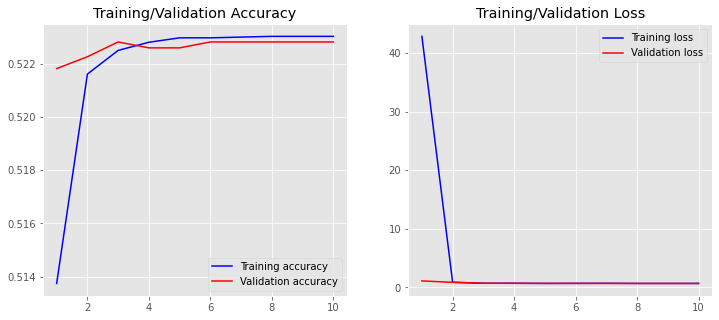

In [ ]:
# Plot the training and validation history.
plt_hist(history)


# Convolutional Neural Network

In [19]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=True))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.MaxPooling1D())
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Epoch 1/10
842/842 [==============================] - 18s 19ms/step - loss: 0.1096 - acc: 0.9591 - val_loss: 0.0704 - val_acc: 0.9748
Epoch 2/10
842/842 [==============================] - 16s 19ms/step - loss: 0.0232 - acc: 0.9922 - val_loss: 0.0354 - val_acc: 0.9894
Epoch 3/10
842/842 [==============================] - 16s 19ms/step - loss: 0.0070 - acc: 0.9979 - val_loss: 0.0525 - val_acc: 0.9861
Epoch 4/10
842/842 [==============================] - 16s 19ms/step - loss: 0.0158 - acc: 0.9948 - val_loss: 0.0437 - val_acc: 0.9889
Epoch 5/10
842/842 [==============================] - 16s 19ms/step - loss: 0.0156 - acc: 0.9952 - val_loss: 0.0508 - val_acc: 0.9875
Epoch 6/10
842/842 [==============================] - 16s 19ms/step - loss: 0.0040 - acc: 0.9984 - val_loss: 0.0489 - val_acc: 0.9902
Epoch 7/10
842/842 [==============================] - 16s 19ms/step - loss: 0.0084 - acc: 0.9976 - val_loss: 0.0644 - val_acc: 0.9882
Epoch 8/10
842/842 [==============================] - 16s 19ms

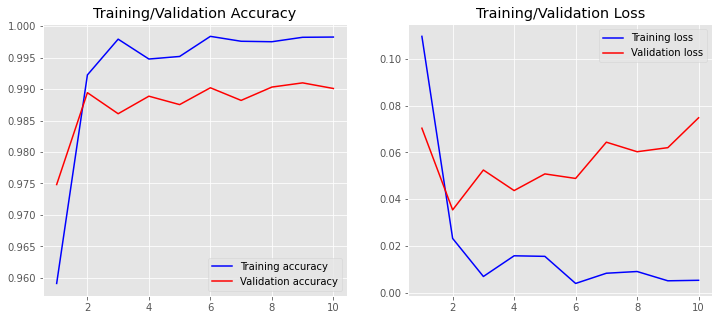

In [20]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plt_hist(history)

In [21]:
clear_session()

In [22]:
# Calculate model accuracy and loss from training data.
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
# Calculate model accuracy and loss from test data.
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))
print("Testing Loss: {:.4f}".format(loss))

Training Accuracy: 0.9965
Training Loss: 0.0221
Testing Accuracy: 0.9915
Testing Loss: 0.0632


# Recurrent Neural Network



In [27]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Epoch 1/10
842/842 [==============================] - 54s 60ms/step - loss: 0.1543 - acc: 0.9427 - val_loss: 0.0802 - val_acc: 0.9727
Epoch 2/10
842/842 [==============================] - 49s 59ms/step - loss: 0.0588 - acc: 0.9814 - val_loss: 0.0445 - val_acc: 0.9864
Epoch 3/10
842/842 [==============================] - 50s 59ms/step - loss: 0.0322 - acc: 0.9893 - val_loss: 0.0363 - val_acc: 0.9880
Epoch 4/10
842/842 [==============================] - 50s 59ms/step - loss: 0.0273 - acc: 0.9912 - val_loss: 0.0380 - val_acc: 0.9885
Epoch 5/10
842/842 [==============================] - 55s 65ms/step - loss: 0.0138 - acc: 0.9955 - val_loss: 0.0284 - val_acc: 0.9918
Epoch 6/10
842/842 [==============================] - 50s 60ms/step - loss: 0.0267 - acc: 0.9911 - val_loss: 0.0373 - val_acc: 0.9888
Epoch 7/10
842/842 [==============================] - 50s 60ms/step - loss: 0.0122 - acc: 0.9960 - val_loss: 0.0384 - val_acc: 0.9879
Epoch 8/10
842/842 [==============================] - 50s 60ms

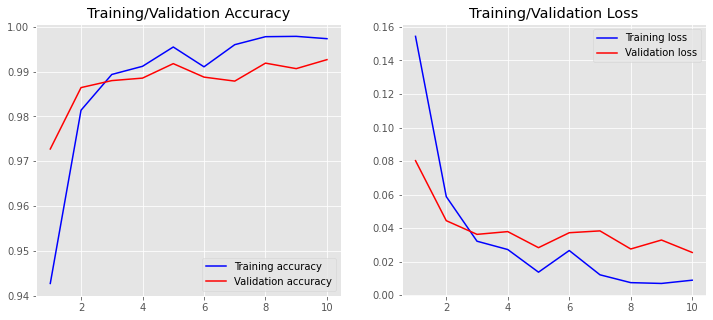

In [28]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plt_hist(history)

In [29]:
clear_session()

In [30]:
# Calculate model accuracy and loss from training data.
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
# Calculate model accuracy and loss from test data.
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))
print("Testing Loss: {:.4f}".format(loss))

Training Accuracy: 0.9977
Training Loss: 0.0089
Testing Accuracy: 0.9915
Testing Loss: 0.0276


# Hybrid CNN/RNN Neural Network

In [24]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.MaxPooling1D())
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Epoch 1/10
842/842 [==============================] - 29s 32ms/step - loss: 0.1105 - acc: 0.9586 - val_loss: 0.0592 - val_acc: 0.9803
Epoch 2/10
842/842 [==============================] - 27s 32ms/step - loss: 0.0342 - acc: 0.9888 - val_loss: 0.0517 - val_acc: 0.9815
Epoch 3/10
842/842 [==============================] - 27s 32ms/step - loss: 0.0187 - acc: 0.9938 - val_loss: 0.0246 - val_acc: 0.9909
Epoch 4/10
842/842 [==============================] - 27s 32ms/step - loss: 0.0106 - acc: 0.9965 - val_loss: 0.0319 - val_acc: 0.9892
Epoch 5/10
842/842 [==============================] - 27s 32ms/step - loss: 0.0085 - acc: 0.9973 - val_loss: 0.0242 - val_acc: 0.9921
Epoch 6/10
842/842 [==============================] - 27s 32ms/step - loss: 0.0060 - acc: 0.9981 - val_loss: 0.0229 - val_acc: 0.9921
Epoch 7/10
842/842 [==============================] - 27s 32ms/step - loss: 0.0041 - acc: 0.9987 - val_loss: 0.0225 - val_acc: 0.9927
Epoch 8/10
842/842 [==============================] - 27s 32ms

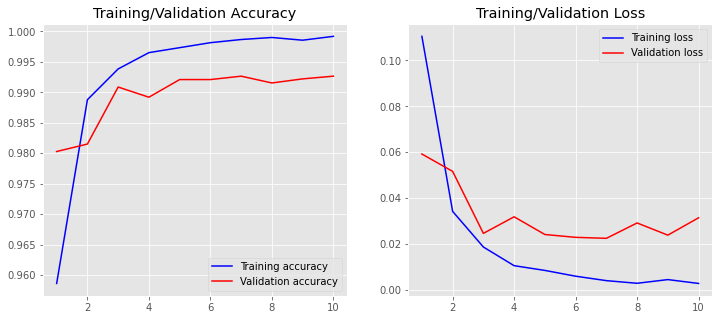

In [25]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plt_hist(history)

In [22]:
clear_session()

In [23]:
# Calculate model accuracy and loss from training data.
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
# Calculate model accuracy and loss from test data.
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(accuracy))
print("Testing Loss: {:.4f}".format(loss))

Training Accuracy: 0.9975
Training Loss: 0.0093
Testing Accuracy: 0.9910
Testing Loss: 0.0401
